In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
path = '/content/drive/MyDrive/Saras_AI/FashionNet.pkl'

In [4]:
df = pd.read_pickle(path)

In [5]:
df.head()

,image,label,tag
0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",9,Ankle boot
1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.00392156862745098...",0,T-shirt/top
2,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0,T-shirt/top
3,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.12...",3,Dress
4,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0,T-shirt/top


In [6]:
X = np.stack(df.iloc[:,0])
X.astype('float32')
X.shape

(60000, 28, 28)

Flattening the 28*28 matrix before model.fit()

In [7]:
X = X.reshape(-1,28*28)

In [8]:
X.shape

(60000, 784)

In [9]:
y = np.stack(df.iloc[:,1])
y.astype('float32')
y.shape

(60000,)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Training a Neural Network ###

- 1 hidden layer with 2 nodes.
- Activation function: Sigmoid
- Loss function: MSE
- Taking the average of both nodes' output and multiplying it with 10 and calculating the error.
- Later, rounding off the prediction after training.
- Tensorflow uses SGD optimization under the hood.
- Training with 50 epochs.


In [11]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Lambda
from tensorflow.keras.models import Model

inputs = Input(shape=(784,))
hidden = Dense(2, activation='sigmoid')(inputs)  # 2 hidden nodes
avg_output = Lambda(lambda x: tf.reduce_mean(x, axis=1, keepdims=True) * 10)(hidden)
outputs = Lambda(lambda x: tf.squeeze(x, axis=1))(avg_output)  # final output shape (None,)

model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │         1,570 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lambda (Lambda)                 │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lambda_1 (Lambda)               │ (None)                 │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,570 (6.13 KB)

 Trainable params: 1,570 (6.13 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
history1 = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data = (X_test, y_test))


Epoch 1/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 2.7772 - mae: 1.2247 - val_loss: 1.8111 - val_mae: 0.9486
Epoch 2/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 1.9469 - mae: 0.9968 - val_loss: 1.9757 - val_mae: 1.0233
Epoch 3/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.8823 - mae: 0.9710 - val_loss: 1.7741 - val_mae: 0.9371
Epoch 4/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.8191 - mae: 0.9494 - val_loss: 1.8295 - val_mae: 0.9547
Epoch 5/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 1.7910 - mae: 0.9408 - val_loss: 1.9937 - val_mae: 1.0309
Epoch 6/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 1.7946 - mae: 0.9368 - val_loss: 1.6896 - val_mae: 0.9036
Epoch 7/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.7641 - mae: 0.9306 - val_loss: 1.8187 - val_mae: 0.9338
Epoch 8/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.7444 - mae: 0.9220 - val_loss: 1.6939 - val_mae: 0.8907
Epoch 9/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - lo

In [13]:
train_loss1 = history1.history['loss']
test_loss1 = history1.history['val_loss']


In [14]:
history1.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

In [15]:
y_train_pred = model.predict(X_train)
print("Raw outputs:", y_train_pred)
print("Rounded predictions:", np.clip(np.round(y_train_pred), 0, 9))

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
Raw outputs: [6.937254  2.4814668 5.725641  ... 2.9716792 4.0319004 1.1327492]
Rounded predictions: [7. 2. 6. ... 3. 4. 1.]


In [16]:
y_test_pred = model.predict(X_test)  # First 10 images
print("Raw outputs:", y_test_pred)
print("Rounded predictions:", np.clip(np.round(y_test_pred), 0, 9))

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Raw outputs: [7.244684  7.851571  7.0527487 ... 7.992788  7.6907425 7.146591 ]
Rounded predictions: [7. 8. 7. ... 8. 8. 7.]


In [17]:
train_preds = model.predict(X_train)
train_preds_rounded = np.clip(np.round(train_preds), 0, 9).astype('int32')

# 🎯 True labels
y_train_true = y_train.astype('int32')

# ✅ Calculate train accuracy
train_accuracy = np.mean(train_preds_rounded == y_train_true)
print(f"Train Accuracy: {train_accuracy * 100:.2f}%")

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Train Accuracy: 45.46%


In [18]:
test_preds = model.predict(X_test)
test_preds_rounded = np.clip(np.round(test_preds), 0, 9).astype('int32')

# ✅ Calculate test accuracy
test_accuracy = np.mean(test_preds_rounded == y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Test Accuracy: 44.85%


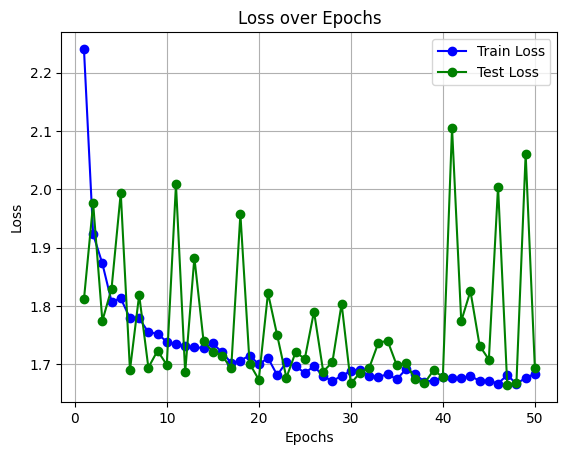

In [29]:

epochs = range(1, len(train_loss1) + 1)

plt.plot(epochs, train_loss1, 'bo-', label='Train Loss')
plt.plot(epochs, test_loss1, 'go-', label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.grid(True)
plt.show()

### Improving the model ###

- Using 3 nodes in a single hidden layer for better prediction using 10 categories for softmax.
- Will use ReLU as activation function instead of sigmoid.
- Loss function: CategoricalCrossEntropy

In [22]:
from tensorflow.keras.utils import to_categorical

y = to_categorical(y, num_classes=10)

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.losses import CategoricalCrossentropy


model = Sequential([
    Dense(3, activation='sigmoid', input_shape=(784,)),   # Increased hidden neurons by 1
    Dense(10, activation='softmax')                        # 10 classes, softmax
])

# Compile model with cross entropy
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train
history2 = model.fit(X_train, y_train, epochs = 30, validation_split=0.2)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.3778 - loss: 2.0031 - val_accuracy: 0.5650 - val_loss: 1.5388
Epoch 2/30
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.5648 - loss: 1.4464 - val_accuracy: 0.5780 - val_loss: 1.2416
Epoch 3/30
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5785 - loss: 1.1879 - val_accuracy: 0.5761 - val_loss: 1.0927
Epoch 4/30
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5918 - loss: 1.0593 - val_accuracy: 0.6178 - val_loss: 0.9985
Epoch 5/30
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6265 - loss: 0.9713 - val_accuracy: 0.6481 - val_loss: 0.9325
Epoch 6/30
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6586 - loss: 0.9059 - val_accuracy: 0.6748 - val_loss: 0.8745
Epoch 7/30
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6762 - loss: 0.8508 - val_accuracy: 0.6899 - val_loss: 0.8369
Epoch 8/30
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6900 - loss: 0.8169 - 

In [24]:
train_loss2 = history2.history['loss']
test_loss2 = history2.history['val_loss']

In [25]:
train_preds = model.predict(X_train)
train_preds_rounded = np.clip(np.round(train_preds), 0, 9).astype('int32')

# 🎯 True labels
y_train_true = y_train.astype('int32')
train_preds_labels = np.argmax(train_preds, axis=1)

# Now you can compare with true labels
train_accuracy = np.mean(train_preds_labels == y_train_true)
print(f"Train Accuracy: {train_accuracy * 100:.2f}%")


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Train Accuracy: 78.12%


In [26]:
test_preds = model.predict(X_test)
test_preds_rounded = np.clip(np.round(test_preds), 0, 9).astype('int32')


y_test_true = y_test.astype('int32')
test_preds_labels = np.argmax(test_preds, axis=1)

test_accuracy = np.mean(test_preds_labels == y_test_true)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Test Accuracy: 76.89%


### Loss Over Epochs plot for improved model ###

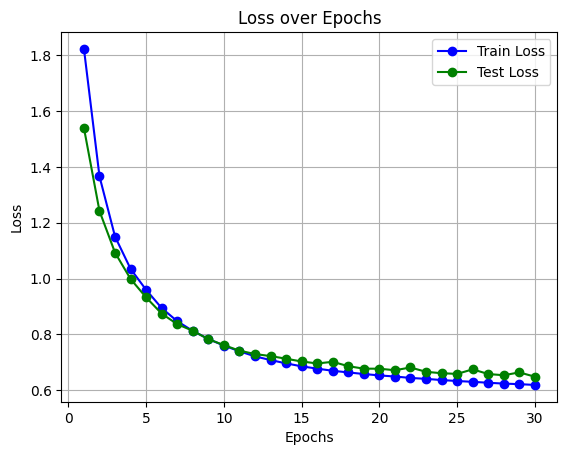

In [28]:
import matplotlib.pyplot as plt

epochs = range(1, len(train_loss2) + 1)

plt.plot(epochs, train_loss2, 'bo-', label='Train Loss')
plt.plot(epochs, test_loss2, 'go-', label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.grid(True)
plt.show()

## Differences and improvements in models ##

### Model 1 ###

- 784 inputs passed through a single hidden layer with 2 nodes.
- Both the neurons had sigmoid as the activation function.
- The output layer took the average of the outputs of the 2 nodes in the hidden layer.
- Loss Function: Mean Squared Error
- Optimization : Stochastic Gradient Descent.
- Accuracy: Training - 45.45% , Testing - 44.85%


### Model 2 ###

- 784 inputs passed through a sigle hidden layer with 3 nodes.
- All the nodes had ReLU as the activation function.
- The output layer used softmax as the activation function with a total category count of 10.
- Loss Function: CategoricalCrossEntropy
- Optimization: Adam
- Accuracy: Training - 78.12%, Testing - 76.89%